This notebook reproduces the results found in the article "Transition Graphs of Interacting Hysterons: Structure, Design, Organization and Statistics" by M.H. Teunisse & M.v. Hecke (2025).

Contact:

Margot Teunisse

teunisse@physics.leidenuniv.nl

In [2]:
import sys
sys.path.append("./src")
import numpy as np
from matplotlib import pyplot as plt 
import itertools
from hysteron_tgraphs.model import *
from hysteron_tgraphs import plotting

Section 1: Model, Transitions and T-Graphs

Switching fields:


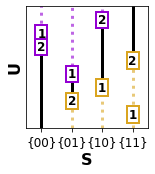

Scaffold:
U^+(00)= 2
U^+(01)= 1
U^-(01)= 2
U^+(10)= 2
U^-(10)= 1
U^-(11)= 2

 T-graph:


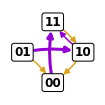

In [3]:
#Define a set of switching fields (1a, Fig. 1b)
print("Switching fields:")
switching_fields = SwitchingFields(2)
switching_fields[(0, 0)] = [7, 6]
switching_fields[(0, 1)] = [4, 2]
switching_fields[(1, 0)] = [3, 8]
switching_fields[(1, 1)] = [1, 5]

plotting.plot_sfs(switching_fields)
plt.show()

#Construct the scaffold (Fig. 1c-d)
print("Scaffold:")
scaffold = switching_fields.scaffold()
for (state, direction) in scaffold:
    k = scaffold[(state, direction)]
    print("U^{}({})=".format(['+', '-'][(1-direction)//2], plotting.state_to_label(state)), k+1)

#Construct the t-graph (1b, Fig. 2f)
print("\n T-graph:")
graph = make_graph(switching_fields)

plotting.transition_graph(graph)
plt.show();

Section 2: Graph Design

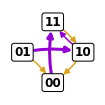

Inequalities:
U_2^-(11) > U_1^+(01)
U_1^+(01) > U_1^-(11)
U_2^-(11) > U_2^-(01)
U_2^+(00) > U_1^-(10)
U_2^+(10) > U_1^-(10)
U_1^+(00) > U_1^-(10)
U_2^+(10) > U_2^-(11)
U_2^+(00) > U_2^-(11)
U_1^+(00) > U_2^-(11)
U_2^+(00) > U_1^+(01)
U_2^+(10) > U_1^+(01)
U_1^+(01) > U_1^-(10)
U_1^+(00) > U_1^+(01)
U_2^+(00) > U_2^-(01)
U_2^+(10) > U_2^-(01)
U_1^+(00) > U_2^-(01)
U_2^-(11) > U_1^-(11)
U_1^+(01) > U_2^-(01)
U_1^+(00) > U_2^+(00)
U_2^-(11) > U_1^-(10)
U_2^+(00) > U_1^-(11)
U_2^+(10) > U_1^-(11)
U_1^+(00) > U_1^-(11)

Graph is  realizable.


In [4]:
#Find design inequalities for example graph (2a, Fig. 4). This is a partial order on the switching fields (2b, Fig. 5). 
graph = Graph(2)
graph.add((0, 0), (1, 0))
graph.add((0, 1), (0, 1))
graph.add((0, 1), (1,))
graph.add((1, 0), (0,))
graph.add((1, 0), (1,))
graph.add((1, 1), (1,))
plotting.transition_graph(graph)
plt.show()

switching_field_order = make_design_inequalities(graph)

#Show inequalities
print("Inequalities:")
for ((stateA, i), (stateB, j)) in switching_field_order.get():
    print("U_{}^{}({}) > U_{}^{}({})".format(i+1, ['+', '-'][stateA[i]], plotting.state_to_label(stateA), 
                                        j+1, ['+', '-'][stateB[j]], plotting.state_to_label(stateB)))

#Check if switching field order is valid for example graph (2c)
print("\nGraph is {} realizable.".format(["not", ""][int(switching_field_order.valid)]))

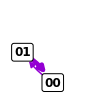


Graph is not realizable.


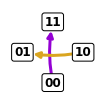


Graph is not realizable.


In [5]:
#Examples of impossible combinations of transitions (2c continued, Fig. 6)

#Fig. 6a
graph = Graph(2)
graph.add((0, 0), (1,))
graph.add((0, 1), (0, 1, 0))
plotting.transition_graph(graph)
plt.show()

switching_field_order = make_design_inequalities(graph)
print("\nGraph is {} realizable.".format(["not", ""][int(switching_field_order.valid)]))

#Fig. 6b
graph = Graph(2)
graph.add((1, 0), (0, 1))
graph.add((0, 0), (1, 0))
plotting.transition_graph(graph)
plt.show()

switching_field_order = make_design_inequalities(graph)
print("\nGraph is {} realizable.".format(["not", ""][int(switching_field_order.valid)]))

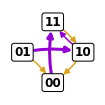

Solution:


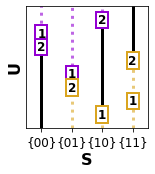

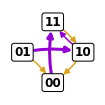

In [6]:
#Use the design inequalities to find a set of switching fields that realizes a given graph (2d).
graph = Graph(2)
graph.add((0, 0), (1, 0))
graph.add((0, 1), (0, 1))
graph.add((0, 1), (1,))
graph.add((1, 0), (0,))
graph.add((1, 0), (1,))
graph.add((1, 1), (1,))
plotting.transition_graph(graph)
switching_field_order = make_design_inequalities(graph)
plt.show()

print("Solution:")
switching_fields = generate_general_solution(switching_field_order)
plotting.plot_sfs(switching_fields)

#Check that the switching fields indeed generate the given graph.
graph = make_graph(switching_fields)
plotting.transition_graph(graph);

Section 3: Constructing and organizing all t-graphs.

In [7]:
from hysteron_tgraphs import candidategraphs

In [8]:
#Count all scaffolds numerically and analytically (3a)
print("----\n Numerical \n----")
for num_hysts in range(2, 4):
    count = 0
    for scaffold in candidategraphs.make_all_scaffolds(num_hysts):
        count += 1

    print(r"Number of $n={}$ scaffolds:".format(num_hysts), count)
    
print("----\n Analytical \n----")
for num_hysts in range(2, 6):
    print(r"Number of $n={}$ scaffolds:".format(num_hysts), candidategraphs.count_scaffolds(num_hysts))

----
 Numerical 
----
Number of $n=2$ scaffolds: 2
Number of $n=3$ scaffolds: 96
----
 Analytical 
----
Number of $n=2$ scaffolds: 2
Number of $n=3$ scaffolds: 96
Number of $n=4$ scaffolds: 17915904
Number of $n=5$ scaffolds: 798699998426557317120


In [9]:
#Show binary trees of possible avalanches for each scaffold & count number of combinations (3b, Fig. 7)
num_hysts = 2
for no, scaffold in enumerate(candidategraphs.make_all_scaffolds(num_hysts)):
    print("Scaffold", no+1)
    avalanche_forest = candidategraphs.make_avalanche_forest(scaffold)
    for (state, direction) in scaffold:
        print("{}{}:".format(plotting.state_to_label(state), ["U", "D"][(1-direction)//2]), avalanche_forest[(state, direction)])
    print("Number of combinations:", candidategraphs.count_candidate_graphs(avalanche_forest))
    print("\n")

Scaffold 1
00U: ((1,), (1, 0))
01U: ((0,),)
01D: ((1,),)
10U: ((1,), (1, 0), (1, 0, 1))
10D: ((0,), (0, 1), (0, 1, 0))
11D: ((0,), (0, 1))
Number of combinations: 36


Scaffold 2
00U: ((1,), (1, 0), (1, 0, 1))
01U: ((0,), (0, 1), (0, 1, 0))
01D: ((1,),)
10U: ((1,),)
10D: ((0,), (0, 1), (0, 1, 0))
11D: ((1,), (1, 0), (1, 0, 1))
Number of combinations: 81




Number of realizable graphs: 35
Number of realizable graphs with GoE states removed: 13


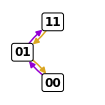

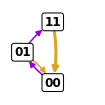

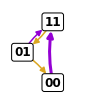

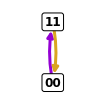

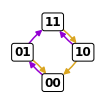

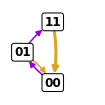

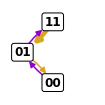

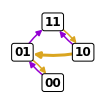

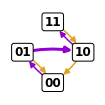

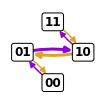

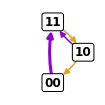

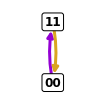

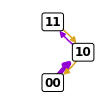

In [11]:
#Import function to remove Garden-of-Eden states; this uses the NetworkX package. 
from hysteron_tgraphs.graph_analysis import remove_goe

#Count number of realizable n=2 graphs (3c)
num_hysts = 2

count = 0
graphs_without_goe = []
for graph in candidategraphs.make_all_candidate_graphs(num_hysts):
    switching_field_order = make_design_inequalities(graph)
    count += switching_field_order.valid
    
    graph_reduced = remove_goe(graph)
    if not any([graph_reduced == graph_old for graph_old in graphs_without_goe]):
        graphs_without_goe.append(graph_reduced)
print("Number of realizable graphs:", count)

#Count & plot realizable n=2 graphs with GoE states removed. 
#Note there are two pairs of graphs which only differ by their intermediate states. 
count = 0
for graph in graphs_without_goe:
    switching_field_order = make_design_inequalities(graph)
    if switching_field_order.valid:
        plotting.transition_graph(graph)
        count += 1
print("Number of realizable graphs with GoE states removed:", count);

Section 4: Statistical weight of t-graphs

In [12]:
#Import function to directly calculate the volume of the polyhedron; this uses pycddlib and scipy.spatial.
#Note that pycddlib is a nonstandard dependency, which is only used for this function.
from hysteron_tgraphs.polyhedron_analysis import calculate_polyhedron_volume

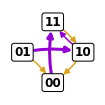

Number of linear extensions: 18
Graph probability: 0.0004464285714285714


AttributeError: module 'cdd' has no attribute 'Polyhedron'

In [13]:
# Count number of total orders for example graph (4a)
graph = Graph(2)
graph.add((0, 0), (1, 0))
graph.add((0, 1), (0, 1))
graph.add((0, 1), (1,))
graph.add((1, 0), (0,))
graph.add((1, 0), (1,))
graph.add((1, 1), (1,))
plotting.transition_graph(graph)
plt.show()

switching_field_order = make_design_inequalities(graph)
count = count_linear_extensions(switching_field_order)
print("Number of linear extensions:", count)

#Calculate probability of graph
total_count = np.math.factorial(graph.num_hysts*2**graph.num_hysts)
print("Graph probability:", count/total_count)
print("Fractional volume of polyhedron (for comparison):", calculate_polyhedron_volume(switching_field_order))

In [9]:
#Count probability of all n=2 graphs (4b)
num_hysts = 2

total_count = int(np.math.factorial(num_hysts*2**num_hysts)/np.math.factorial(num_hysts))
print("Total number of total orders:", total_count)

well_defined_count = 0
graphs_without_goe = []
for graph in candidategraphs.make_all_candidate_graphs(2):
    switching_field_order = make_design_inequalities(graph)
    if switching_field_order.valid:
        well_defined_count += count_linear_extensions(switching_field_order)
        
    graph_reduced = remove_goe(graph)
    if not any([graph_reduced == graph_old for graph_old in graphs_without_goe]):
        graphs_without_goe.append(graph_reduced)
    
print("Number of total orders corresponding to well-defined graphs:", well_defined_count)

print("Percentage of parameter space that is well-defined:", (well_defined_count/total_count)*100, "%")

well_defined_count = 0
for graph in graphs_without_goe:
    switching_field_order = make_design_inequalities(graph) 
    if switching_field_order.valid:
        well_defined_count += count_linear_extensions(switching_field_order)
    
print("\nNumber of total orders corresponding to well-defined graphs excluding GoE:", well_defined_count)

print("Percentage of parameter space that is well-defined when excluding GoE:", (well_defined_count/total_count)*100, "%")

Total number of total orders: 20160
Number of total orders corresponding to well-defined graphs: 850
Percentage of parameter space that is well-defined: 4.216269841269842 %

Number of total orders corresponding to well-defined graphs excluding GoE: 1977
Percentage of parameter space that is well-defined when excluding GoE: 9.806547619047619 %


Total number of total orders: 1260
Number of total orders corresponding to well-defined graphs: 850
Percentage of parameter space that is well-defined: 67.46031746031747 %


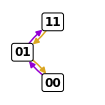

Number of total orders: 398
Graph probability: 31.587301587301585 %


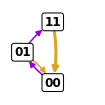

Number of total orders: 75
Graph probability: 5.952380952380952 %


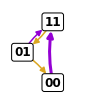

Number of total orders: 75
Graph probability: 5.952380952380952 %


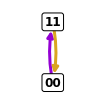

Number of total orders: 82
Graph probability: 6.507936507936509 %


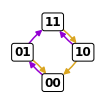

Number of total orders: 136
Graph probability: 10.793650793650794 %


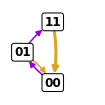

Number of total orders: 92
Graph probability: 7.301587301587302 %


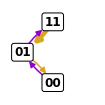

Number of total orders: 36
Graph probability: 2.857142857142857 %


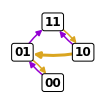

Number of total orders: 34
Graph probability: 2.6984126984126986 %


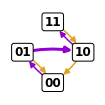

Number of total orders: 34
Graph probability: 2.6984126984126986 %


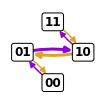

Number of total orders: 17
Graph probability: 1.3492063492063493 %


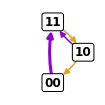

Number of total orders: 92
Graph probability: 7.301587301587302 %


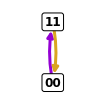

Number of total orders: 117
Graph probability: 9.285714285714286 %


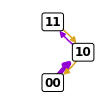

Number of total orders: 36
Graph probability: 2.857142857142857 %

Number of total orders corresponding to well-defined graphs excluding GoE: 1224
Percentage of parameter space that is well-defined when excluding GoE: 97.14285714285714 %


In [10]:
#Count probabilities again, this time forbidding simple self-loops

total_count = int(np.math.factorial(num_hysts*2**num_hysts)/(np.math.factorial(num_hysts)*2**4))
print("Total number of total orders:", total_count)

well_defined_count = 0
for graph in candidategraphs.make_all_candidate_graphs(2):
    switching_field_order = make_design_inequalities(graph)
    
    #Forbid simple self-loops; note this does not change the count here
    for i in range(num_hysts):
        for s in itertools.product([0, 1], repeat=num_hysts-1):
            stateA = s[:i] + (0,) + s[i:]
            stateB = s[:i] + (1,) + s[i:]
            switching_field_order.add(stateA, i, stateB, i)
    
    if switching_field_order.valid:
        well_defined_count += count_linear_extensions(switching_field_order)

print("Number of total orders corresponding to well-defined graphs:", well_defined_count)

print("Percentage of parameter space that is well-defined:", (well_defined_count/total_count)*100, "%")

well_defined_count = 0
for graph in graphs_without_goe:
    switching_field_order = make_design_inequalities(graph) 
    
    #Forbid simple self-loops
    for i in range(num_hysts):
        for s in itertools.product([0, 1], repeat=num_hysts-1):
            stateA = s[:i] + (0,) + s[i:]
            stateB = s[:i] + (1,) + s[i:]
            switching_field_order.add(stateA, i, stateB, i)
            
    if switching_field_order.valid:
        #Show individual graphs and their probabilities (Fig. 8)
        plotting.transition_graph(graph)
        plt.show()
        
        count = count_linear_extensions(switching_field_order)
        
        print("Number of total orders:", count)
        print("Graph probability:", (count/total_count)*100, "%")
        
        well_defined_count += count

print("\nNumber of total orders corresponding to well-defined graphs excluding GoE:", well_defined_count)

print("Percentage of parameter space that is well-defined when excluding GoE:", (well_defined_count/total_count)*100, "%")